In [3]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #    wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # +    wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # +    noise
    return series[..., np.newaxis].astype(np.float32)

In [5]:
import numpy as np

In [6]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [7]:
import matplotlib.pyplot as plt

In [12]:
y_train.shape

(7000, 1)

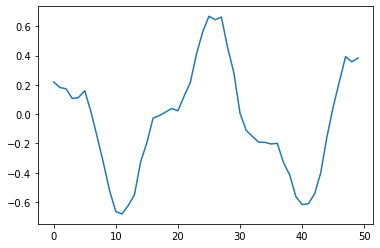

[0.27272552]


In [20]:
plt.plot(X_train[4])
plt.show()
print(y_train[4])

In [22]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])


In [27]:
model.compile(loss = 'mse')



In [28]:
history = model.fit(X_train, y_train ,epochs=40, validation_data = (X_valid, y_valid))

Epoch 1/40
219/219 [==============================] - 5s 15ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 2/40
219/219 [==============================] - 3s 15ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/40
219/219 [==============================] - 4s 16ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 4/40
219/219 [==============================] - 4s 17ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/40
219/219 [==============================] - 4s 18ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/40
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/40
219/219 [==============================] - 4s 20ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/40
219/219 [==============================] - 5s 21ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/40
219/219 [==============================] - 5s 22ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 10/40
219/219 [==============================] - 4s 20ms/step - loss: 0.0028 - val_lo

<AxesSubplot:>

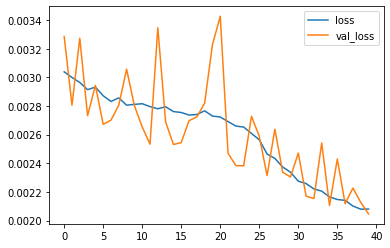

In [30]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [32]:
y_pred = model.predict(X_test)

In [34]:
y_pred[4], y_test[4]

(array([-0.40836433], dtype=float32), array([-0.42012876], dtype=float32))

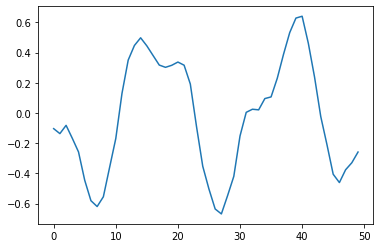

In [38]:
plt.plot(X_test[0])
plt.plot(y_pred[0], color = 'red')
plt.show()

In [66]:
n_steps = 500
point_pred = 10
series = generate_time_series(1, n_steps + point_pred)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(point_pred):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

In [67]:
series.shape

(1, 510, 1)

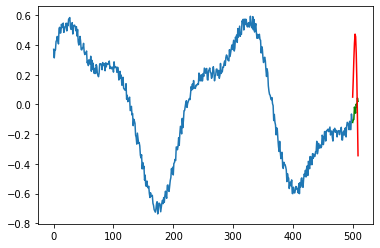

In [69]:
plt.plot(X_new[0])
plt.plot(range(n_steps,n_steps+len(Y_new[0])), Y_new[0], color= 'green')
plt.plot(range(n_steps,n_steps+len(Y_pred[0])), Y_pred[0], color = 'red')

In [70]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:,
0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [71]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,
1]),
keras.layers.SimpleRNN(20),
keras.layers.Dense(10)
])

In [72]:
model.compile(loss = 'mse')


In [74]:
history = model.fit(X_train, Y_train ,epochs=10, validation_data = (X_valid, Y_valid))

Epoch 1/10
219/219 [==============================] - 66s 303ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 2/10
219/219 [==============================] - 68s 312ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 3/10
219/219 [==============================] - 68s 312ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 4/10
219/219 [==============================] - 70s 318ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 5/10
219/219 [==============================] - 69s 316ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 6/10
219/219 [==============================] - 73s 335ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 7/10
219/219 [==============================] - 70s 318ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 8/10
219/219 [==============================] - 69s 314ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 9/10
219/219 [==============================] - 68s 311ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 10/10
219/219 [==============================] - 72s 328ms/step - l

<AxesSubplot:>

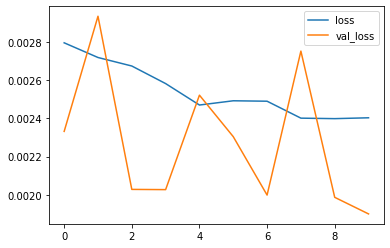

In [75]:
pd.DataFrame(history.history).plot()

In [77]:
Y_pred = model.predict(X_test)

In [78]:
Y_pred.shape

(1000, 10)

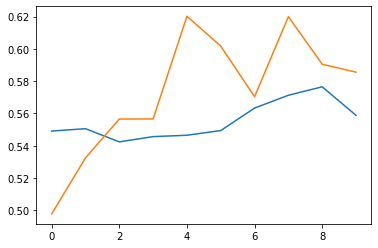

In [85]:
plt.plot(Y_pred[4])
plt.plot(Y_test[4])

In [86]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,
1]),
keras.layers.SimpleRNN(20, return_sequences=True),
keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [89]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=
[last_time_step_mse])

In [93]:
Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps,
0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [95]:
model.fit(X_train, Y_train, epochs = 40, validation_data = (X_valid, Y_valid))

Epoch 1/40
219/219 [==============================] - 65s 296ms/step - loss: 0.0031 - last_time_step_mse: 0.0026 - val_loss: 0.0028 - val_last_time_step_mse: 0.0022
Epoch 2/40
219/219 [==============================] - 65s 296ms/step - loss: 0.0028 - last_time_step_mse: 0.0024 - val_loss: 0.0024 - val_last_time_step_mse: 0.0021
Epoch 3/40
219/219 [==============================] - 72s 329ms/step - loss: 0.0025 - last_time_step_mse: 0.0022 - val_loss: 0.0024 - val_last_time_step_mse: 0.0020
Epoch 4/40
219/219 [==============================] - 84s 384ms/step - loss: 0.0022 - last_time_step_mse: 0.0019 - val_loss: 0.0021 - val_last_time_step_mse: 0.0018
Epoch 5/40
219/219 [==============================] - 73s 335ms/step - loss: 0.0022 - last_time_step_mse: 0.0020 - val_loss: 0.0022 - val_last_time_step_mse: 0.0019
Epoch 6/40
219/219 [==============================] - 71s 323ms/step - loss: 0.0021 - last_time_step_mse: 0.0019 - val_loss: 0.0021 - val_last_time_step_mse: 0.0018
Epoch 7/40

KeyboardInterrupt: 

In [96]:
Y_pred = model.predict(X_test)

In [97]:
Y_pred.shape


(1000, 500, 10)

In [99]:
Y_pred[0].shape

(500, 10)

In [100]:
Y_test[0].shape

(500, 10)

39


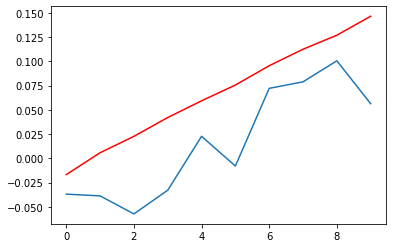

In [134]:
import random
index = random.randint(0,500)
print(index)
plt.plot(Y_test[0][index])
plt.plot(Y_pred[0][index], color = 'red')